In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
ds = pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")

In [4]:
ds.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
ds.describe

<bound method NDFrame.describe of       Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after

In [6]:
ds.shape

(6819, 96)

In [7]:
ds.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [8]:
ds2 = ds["Bankrupt?"]

In [9]:
ds2

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [10]:
ds = ds.drop(columns = ["Bankrupt?"], axis = 1)
ds

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [11]:
x_train, x_test, y_train, y_test = train_test_split(ds, ds2, test_size = 0.25, random_state = 0)

In [12]:
x_train.shape, x_test.shape, ds.shape

((5114, 95), (1705, 95), (6819, 95))

In [13]:
y_train.shape, y_test.shape, ds2.shape

((5114,), (1705,), (6819,))

In [14]:
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [15]:
x_train

array([[-0.58566954, -0.34412577, -0.51362042, ...,  0.04866632,
         0.        , -0.26714477],
       [ 0.02453203, -0.00563253,  0.12339955, ..., -0.01506966,
         0.        ,  1.34607941],
       [ 0.05553157,  0.14593161, -0.04848066, ..., -0.00632642,
         0.        , -0.50236886],
       ...,
       [ 0.68939069,  0.79007919,  0.70991862, ..., -0.0111    ,
         0.        , -0.07956969],
       [ 0.00984803,  0.38085602,  0.00467816, ..., -0.01063666,
         0.        ,  3.118217  ],
       [ 1.45540576,  1.23129924,  1.29289378, ..., -0.00755453,
         0.        ,  0.03649519]])

In [16]:
x_test

array([[-0.39559338, -1.37223584, -0.6642371 , ..., -0.05120416,
         0.        ,  0.06901742],
       [-0.0505195 , -0.00563253, -0.00949752, ..., -0.01528091,
         0.        , -0.18542477],
       [ 0.21297663, -0.32054913,  0.10922386, ...,  0.01812839,
         0.        ,  0.57024106],
       ...,
       [-0.05296683,  0.01878614,  0.1526369 , ...,  0.06730125,
         0.        , -0.5704947 ],
       [ 0.13384621,  0.11309271,  0.00999405, ...,  0.0208476 ,
         0.        , -0.38241728],
       [ 0.59394472,  0.76397648,  0.77725314, ..., -0.01528091,
         0.        ,  0.74781105]])

In [17]:
logclassifier = LogisticRegression(random_state = 0)
decisiontreeclassifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
svmclassifier = SVC(kernel = "linear", random_state = 0)
knnclassifier = KNeighborsClassifier(n_neighbors=5)

In [18]:
logclassifier.fit(x_train, y_train)
decisiontreeclassifier.fit(x_train, y_train)
svmclassifier.fit(x_train, y_train)
knnclassifier.fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [19]:
y_pred_knn = knnclassifier.predict(x_test)
y_pred_dct = decisiontreeclassifier.predict(x_test)
y_pred_svm = svmclassifier.predict(x_test)
y_pred_log = logclassifier.predict(x_test)

In [20]:
print("knn accuracy")
accuracy_score(y_test, y_pred_knn)

knn accuracy


0.9665689149560117

In [21]:
print("dct accuracy")
accuracy_score(y_test, y_pred_dct)

dct accuracy


0.9548387096774194

In [22]:
print("svm accuracy")
accuracy_score(y_test, y_pred_svm)

svm accuracy


0.9706744868035191

In [23]:
print("log accuracy")
accuracy_score(y_test, y_pred_log)

log accuracy


0.9683284457478006

In [24]:
cf_matrix = confusion_matrix(y_test, y_pred_svm)

In [25]:
import seaborn as sns

<Axes: >

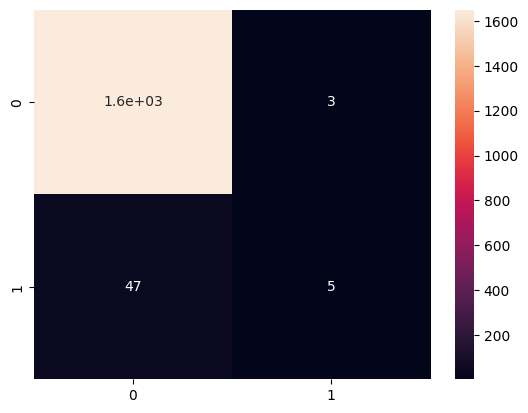

In [26]:
sns.heatmap(cf_matrix, annot=True)